#### In the name of god
# Application of Machine Learning In Biomass Gasification
#### School Of Chemical Engineering<br>College Of Engineering<br>University Of Tehran
Prepared By:<br>Saba Fahmi<br>Seyed Reza Hosseini<br>Mohammad Baghery Tabar<br><br>
Supervisors:<br>Dr.Tavakoli<br>Dr.Nosrati


## 1) Import Required Libraries 


In [1]:

# Import basic operations and plotting
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os


# Import error performance measure, preprocessing etc. from sklearn
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# from sklearn.utils.fixes import loguniform
from sklearn.preprocessing import OrdinalEncoder

# Import Machine Learning Models from sklearn and other libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


## 2) Import dataset 


In [2]:
df_pred = pd.read_csv("https://raw.githubusercontent.com/srhki/Mass-transfer-Project/main/Data/Predictor.csv")
df_tar = pd.read_csv("https://raw.githubusercontent.com/srhki/Mass-transfer-Project/main/Data/Targets.csv")

In [3]:
# Show predictor variables
df_pred

,ID,C,H,N,S,O,feed_LHV,feed_type,feed_shape,feed_particle_size,...,operating_condition,operating_pressure,residence_time,steam_biomass_ratio,ER,gasifying_agent,reactor_type,bed_material,catalyst,scale
0,1,59.39,8.57,0.93,0.27,32.3,19.45,municipal solid waste,pellets,5.0,...,continuous,NaN,120.0,NaN,0.26,air,fluidised bed,olivine,1,pilot
1,2,59.39,8.57,0.93,0.27,32.3,19.45,municipal solid waste,pellets,5.0,...,continuous,NaN,120.0,NaN,0.26,air,fluidised bed,olivine,1,pilot
2,3,59.39,8.57,0.93,0.27,32.3,19.45,municipal solid waste,pellets,5.0,...,continuous,NaN,120.0,NaN,0.27,air,fluidised bed,olivine,1,pilot
3,4,59.39,8.57,0.93,0.27,32.3,19.45,municipal solid waste,pellets,5.0,...,continuous,NaN,120.0,NaN,0.30,air,fluidised bed,olivine,1,pilot
4,5,59.39,8.57,0.93,0.27,32.3,19.45,municipal solid waste,pellets,5.0,...,continuous,NaN,120.0,NaN,0.32,air,fluidised bed,olivine,1,pilot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,51.30,5.81,0.20,0.10,42.6,18.60,woody biomass,pellets,NaN,...,continuous,NaN,NaN,NaN,NaN,steam,fluidised bed,silica,0,pilot
308,309,51.30,5.81,0.20,0.10,42.6,18.60,woody biomass,pellets,NaN,...,continuous,NaN,NaN,NaN,NaN,steam,fluidised bed,silica,0,pilot
309,310,48.30,5.50,0.60,0.01,38.1,16.28,woody biomass,particles,15.0,...,continuous,NaN,6.0,0.6,NaN,steam,other,NaN,0,pilot
310,311,48.30,5.50,0.60,0.01,38.1,16.28,woody biomass,particles,15.0,...,continuous,NaN,6.0,0.7,NaN,steam,other,NaN,0,pilot


In [4]:
# Show target variables
df_tar

,N2,H2,CO,CO2,CH4,C2Hn,gas_LHV,gas_tar,gas_yield,char_yield,CGE,CCE
0,61.77,8.48,9.74,13.36,4.18,2.19,5.390000,73.0,1.620000,NaN,53.000000,70.000000
1,60.64,7.11,8.98,15.69,4.20,2.72,5.652000,47.0,1.730000,NaN,56.000000,80.000000
2,61.67,8.44,10.47,12.28,4.57,2.14,5.550000,58.0,1.720000,NaN,58.000000,75.000000
3,61.86,8.24,10.40,12.83,4.35,2.05,5.160000,39.0,1.910000,NaN,61.000000,81.000000
4,60.66,7.08,12.73,14.04,3.33,1.78,4.910000,5.0,2.040000,NaN,61.000000,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.00,25.00,40.00,16.00,14.00,NaN,12.772570,11.9,0.512960,NaN,35.224825,35.078622
308,0.00,25.50,42.50,13.00,13.50,NaN,12.962895,10.4,0.588988,NaN,41.048331,39.537296
309,0.00,40.40,24.10,21.70,12.20,1.70,12.789380,NaN,0.744418,219.0,58.470607,45.472869
310,0.00,39.40,23.50,23.10,11.30,2.70,12.877375,NaN,0.719894,217.0,56.933448,44.003741


In [5]:
# Show number of NaN/missing values in each column
df_pred.isna().sum()

ID                       0
C                        0
H                        0
N                        0
S                       33
O                        0
feed_LHV                 0
feed_type                0
feed_shape               0
feed_particle_size      42
feed_ash                 0
feed_moisture            0
feed_VM                 48
feed_FC                 90
feed_cellulose         284
feed_hemicellulose     284
feed_lignin            284
temperature              0
operating_condition     10
operating_pressure     115
residence_time         188
steam_biomass_ratio    179
ER                      77
gasifying_agent          0
reactor_type             0
bed_material            78
catalyst                 0
scale                    0
dtype: int64

In [6]:
# df of continuous predictors
df_pred_cont = df_pred.drop(['ID','feed_type','feed_shape', 'operating_condition','gasifying_agent', 
                                   'reactor_type', 'bed_material', 'catalyst', 'scale'], axis=1) 

# drop variables with too many NaN
df_pred_cont = df_pred_cont.drop(['feed_cellulose','feed_hemicellulose', 'feed_lignin','operating_pressure', 
                                   'residence_time', 'steam_biomass_ratio'], axis=1) 

# change column names for plotting
df_pred_cont.columns = ['C', 'H', 'N', 'S', 'O', 'LHV', 'PS', 'Ash', 
                           'M', 'VM', 'FC', 'T', 'ER'] 

# df of categorical predictors
df_pred_cat = df_pred.drop(['ID','feed_particle_size', 'feed_LHV','C', 'H', 'N', 'S', 'O', 'feed_ash', 
                                   'feed_moisture', 'temperature', 'ER','steam_biomass_ratio'], axis=1) 


In [7]:
# Show continuous predictors
df_pred_cont

,C,H,N,S,O,LHV,PS,Ash,M,VM,FC,T,ER
0,59.39,8.57,0.93,0.27,32.3,19.45,5.0,20.69,6.4,NaN,NaN,849.0,0.26
1,59.39,8.57,0.93,0.27,32.3,19.45,5.0,20.69,6.4,NaN,NaN,852.0,0.26
2,59.39,8.57,0.93,0.27,32.3,19.45,5.0,20.69,6.4,NaN,NaN,869.0,0.27
3,59.39,8.57,0.93,0.27,32.3,19.45,5.0,20.69,6.4,NaN,NaN,879.0,0.30
4,59.39,8.57,0.93,0.27,32.3,19.45,5.0,20.69,6.4,NaN,NaN,898.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,51.30,5.81,0.20,0.10,42.6,18.60,NaN,0.43,8.0,84.13,15.43,750.0,NaN
308,51.30,5.81,0.20,0.10,42.6,18.60,NaN,0.43,8.0,84.13,15.43,800.0,NaN
309,48.30,5.50,0.60,0.01,38.1,16.28,15.0,7.50,0.0,71.00,21.50,850.0,NaN
310,48.30,5.50,0.60,0.01,38.1,16.28,15.0,7.50,0.0,71.00,21.50,850.0,NaN


In [8]:
# Show categorical predictors
df_pred_cat

,feed_type,feed_shape,feed_VM,feed_FC,feed_cellulose,feed_hemicellulose,feed_lignin,operating_condition,operating_pressure,residence_time,gasifying_agent,reactor_type,bed_material,catalyst,scale
0,municipal solid waste,pellets,NaN,NaN,NaN,NaN,NaN,continuous,NaN,120.0,air,fluidised bed,olivine,1,pilot
1,municipal solid waste,pellets,NaN,NaN,NaN,NaN,NaN,continuous,NaN,120.0,air,fluidised bed,olivine,1,pilot
2,municipal solid waste,pellets,NaN,NaN,NaN,NaN,NaN,continuous,NaN,120.0,air,fluidised bed,olivine,1,pilot
3,municipal solid waste,pellets,NaN,NaN,NaN,NaN,NaN,continuous,NaN,120.0,air,fluidised bed,olivine,1,pilot
4,municipal solid waste,pellets,NaN,NaN,NaN,NaN,NaN,continuous,NaN,120.0,air,fluidised bed,olivine,1,pilot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,woody biomass,pellets,84.13,15.43,NaN,NaN,NaN,continuous,NaN,NaN,steam,fluidised bed,silica,0,pilot
308,woody biomass,pellets,84.13,15.43,NaN,NaN,NaN,continuous,NaN,NaN,steam,fluidised bed,silica,0,pilot
309,woody biomass,particles,71.00,21.50,NaN,NaN,NaN,continuous,NaN,6.0,steam,other,NaN,0,pilot
310,woody biomass,particles,71.00,21.50,NaN,NaN,NaN,continuous,NaN,6.0,steam,other,NaN,0,pilot


# 3) Correlation between the continuous parameters in the predictors



 Spearman correlation coefficient for continous predictor variables


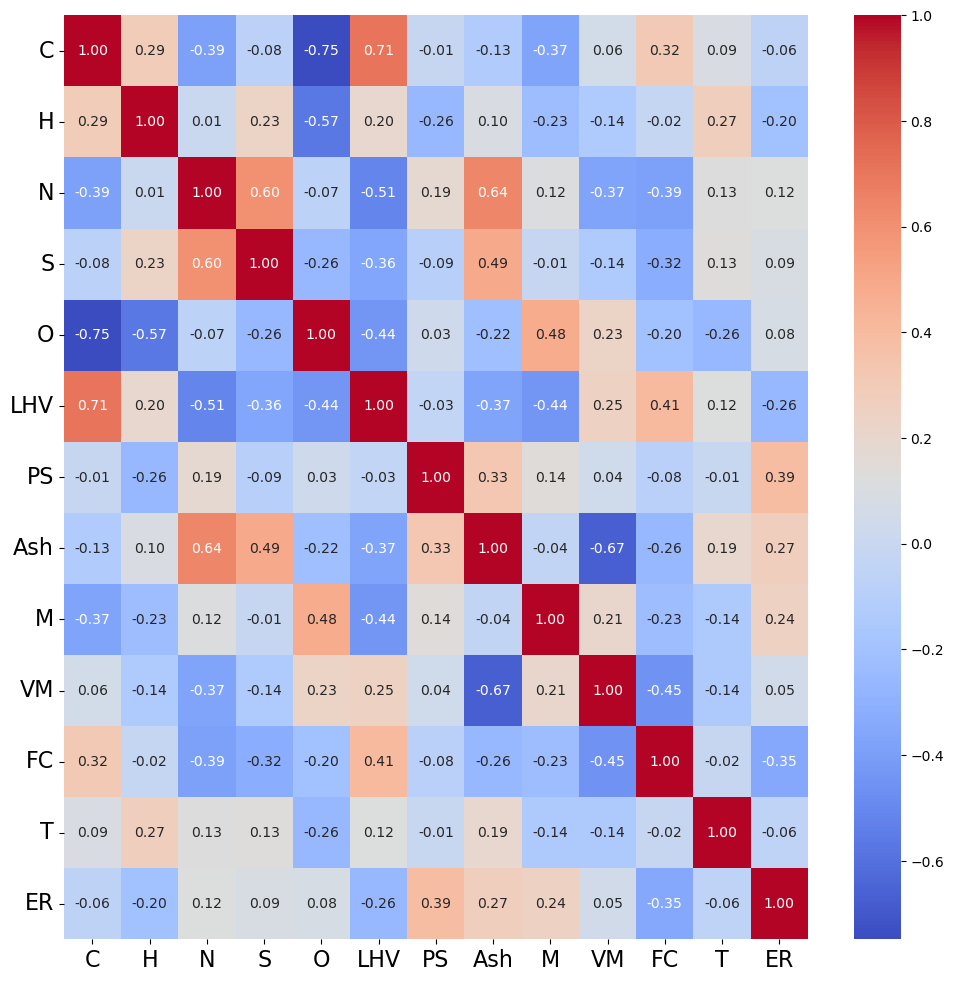

In [9]:
# Define when correlation coefficients are considered significant
#Spearman’s correlation coefficients
SCC=0.6

# Plot correlation between continous predictor variables
print('\n Spearman correlation coefficient for continous predictor variables')
plt.figure(figsize=(12,12))
sns.heatmap(df_pred_cont.corr(method='spearman'), annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation = 0, fontsize= 16)
plt.yticks(rotation = 0, fontsize= 16)
plt.show()

Show highly correlated values with an absolute value greater than 0.6 only


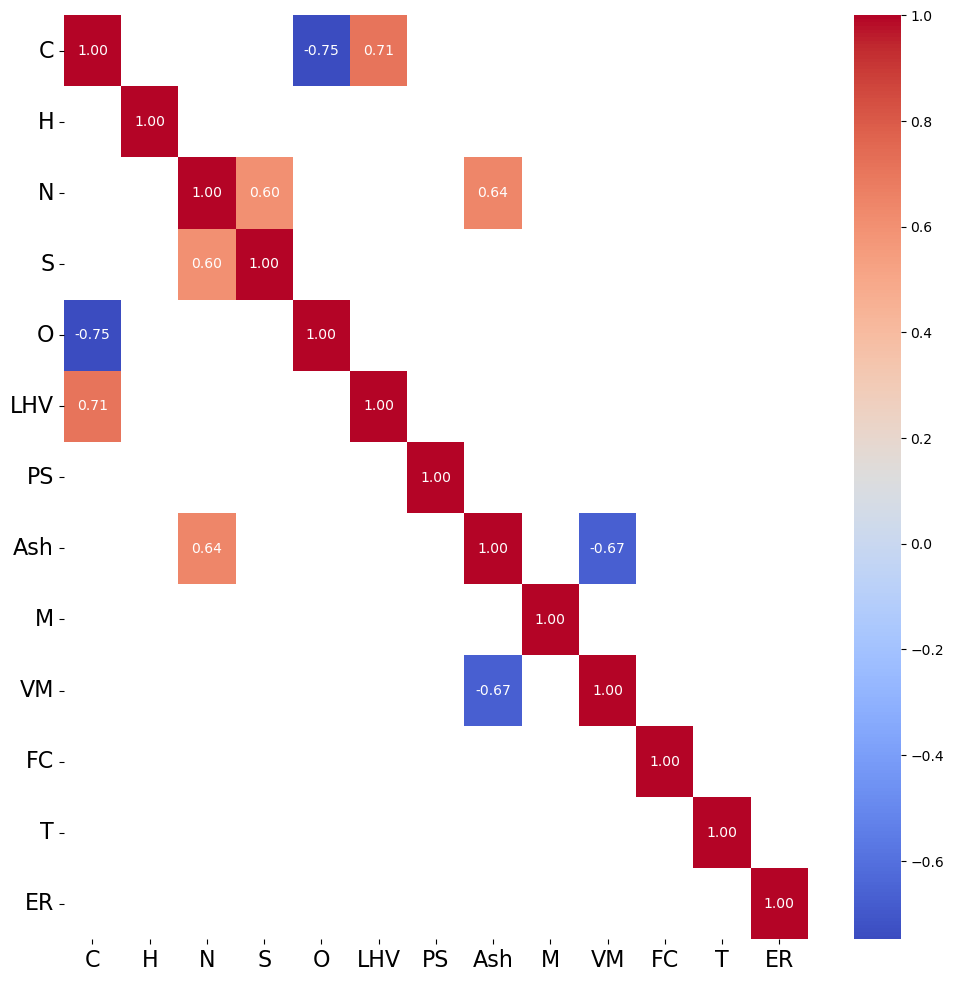

In [10]:
# Repeat figure but this time show highly correlated factors ONLY
print('Show highly correlated values with an absolute value greater than {0} only'.format(SCC))
plt.figure(figsize=(12,12))
pred_spearman_corr = df_pred_cont.corr(method='spearman')
sns.heatmap(pred_spearman_corr[abs(pred_spearman_corr)>=SCC], annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation = 0, fontsize= 16)
plt.yticks(rotation = 0, fontsize= 16)
plt.show()

##### The following predictor variables have high correlations:

C - O, LHV <br>
N - S, Ash <br>
S - N <br>
O - C <br>
LHV - C <br>
Ash - N, VM <br>
VM - Ash <br>

This lead to the subsequent removal of the following factors: N, O, LHV <br>
Furthermore, VM and FC are removed as they are considered dependent factors in the literature.

# 4) Data preprocessing


### 4-1) Preprocessing and preparation of predictor data
Predictor data is being preprocessed to prepare for model training. Categorical variables are encoded using ordinal and one-hot encoding and instances of NaN or missing parameters in dataset are fixed.

---

In [11]:
# Drop unrequired predictors and show data set
df_pred_dropped = df_pred.drop(['ID','feed_type','N','O','feed_LHV','feed_VM','feed_FC','feed_shape','feed_cellulose','feed_hemicellulose',
                              'feed_lignin','operating_pressure','residence_time' ,'steam_biomass_ratio'], axis=1).copy()

# Update predictor variable names 
df_pred_dropped.columns = ['C [%daf]','H [%daf]','S [%daf]','Particle size [mm]','Ash [%db]','Moisture [%wb]',
                        'Temperature [°C]','Operation (Batch/Continuous)','ER',
                        'Gasifying agent','Reactor type','Bed material','Catalyst','Scale']

df_pred_dropped

,C [%daf],H [%daf],S [%daf],Particle size [mm],Ash [%db],Moisture [%wb],Temperature [°C],Operation (Batch/Continuous),ER,Gasifying agent,Reactor type,Bed material,Catalyst,Scale
0,59.39,8.57,0.27,5.0,20.69,6.4,849.0,continuous,0.26,air,fluidised bed,olivine,1,pilot
1,59.39,8.57,0.27,5.0,20.69,6.4,852.0,continuous,0.26,air,fluidised bed,olivine,1,pilot
2,59.39,8.57,0.27,5.0,20.69,6.4,869.0,continuous,0.27,air,fluidised bed,olivine,1,pilot
3,59.39,8.57,0.27,5.0,20.69,6.4,879.0,continuous,0.30,air,fluidised bed,olivine,1,pilot
4,59.39,8.57,0.27,5.0,20.69,6.4,898.0,continuous,0.32,air,fluidised bed,olivine,1,pilot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,51.30,5.81,0.10,NaN,0.43,8.0,750.0,continuous,NaN,steam,fluidised bed,silica,0,pilot
308,51.30,5.81,0.10,NaN,0.43,8.0,800.0,continuous,NaN,steam,fluidised bed,silica,0,pilot
309,48.30,5.50,0.01,15.0,7.50,0.0,850.0,continuous,NaN,steam,other,NaN,0,pilot
310,48.30,5.50,0.01,15.0,7.50,0.0,850.0,continuous,NaN,steam,other,NaN,0,pilot


In [12]:
# Show categories/values of categorical predictors
print('Categories/values of categorical predictors:') 
print('Categories of "Operation (Batch/Continuous)" are:', df_pred_dropped['Operation (Batch/Continuous)'].unique())
print('Categories of "Reactor type" are:',df_pred_dropped['Reactor type'].unique())
print('Categories of "Bed material" are:',df_pred_dropped['Bed material'].unique())
print('Categories of "Scale" are:',df_pred_dropped['Scale'].unique(),'\n')

# Show number of NaN in Operation Mode column
print('Instances of NaN in "Operation (Batch/Continuous)" column:', sum(pd.isna(df_pred_dropped['Operation (Batch/Continuous)'])))
print('For comparison, the number of instances of the two categories are shown for:')
print(df_pred_dropped.groupby(['Operation (Batch/Continuous)']).size(),'\n')

# Fix missing values in the form of NaN in "Operation (Batch/Continuous)" colum before ordinally encoding.
# Since few values are missing and continuous is dominant fill them with the most frequent category (i.e. continuous):
df_pred_preprocessed = df_pred_dropped.copy()
df_pred_preprocessed['Operation (Batch/Continuous)'] = df_pred_preprocessed['Operation (Batch/Continuous)'].fillna(df_pred_preprocessed['Operation (Batch/Continuous)'].mode().iloc[0])
print('Updated categories of "Operation (Batch/Continuous)" are:', df_pred_preprocessed['Operation (Batch/Continuous)'].unique())

# Ordinally encode Operation Mode and System Scale as they only have 2 categories 
encoder_ordinal = OrdinalEncoder()
df_pred_preprocessed[['Operation (Batch/Continuous)', 'Scale']] = encoder_ordinal.fit_transform(df_pred_preprocessed[['Operation (Batch/Continuous)', 'Scale']])
# Show encoded categories 
print('New categories of "Operation (Batch/Continuous)" are:', df_pred_preprocessed['Operation (Batch/Continuous)'].unique())
print('New categories of "Scale" are:',df_pred_preprocessed['Scale'].unique(), '\n')


Categories/values of categorical predictors:
Categories of "Operation (Batch/Continuous)" are: ['continuous' 'batch' nan]
Categories of "Reactor type" are: ['fluidised bed' 'fixed bed' 'other']
Categories of "Bed material" are: ['olivine' 'silica' 'dolomite' nan 'alumina' 'calcium oxide']
Categories of "Scale" are: ['pilot' 'lab'] 

Instances of NaN in "Operation (Batch/Continuous)" column: 10
For comparison, the number of instances of the two categories are shown for:
Operation (Batch/Continuous)
batch          24
continuous    278
dtype: int64 

Updated categories of "Operation (Batch/Continuous)" are: ['continuous' 'batch']
New categories of "Operation (Batch/Continuous)" are: [1. 0.]
New categories of "Scale" are: [1. 0.] 



In [13]:
# Check and preprocess categorical predictors with more than 2 categories before One Hot encoding

# Preprocess bed material column as missing values are present

# Show categories in "Bed material" column before preprocessing
print('Categories in "Bed material" column before preprocessing:')
print(df_pred_dropped['Bed material'].value_counts(),'\n')

# Turn categories with very few instances into category "other"
df_pred_preprocessed['Bed material'] = df_pred_preprocessed['Bed material'].replace({'calcium oxide':'other', 'dolomite':'other'})

# Turn NaN into not applicable (n/a) as these represent fixed bed gasifiers 
df_pred_preprocessed['Bed material'] = df_pred_preprocessed['Bed material'].fillna('N/A')

# Show updated values in Bed material's column
print('Updated categories in "Bed material" column after preprocessing:')
print(df_pred_preprocessed['Bed material'].value_counts(),'\n')

# Show categories in "Reactor type" and "Gasifying agent" column before One Hot encoding
print('Categories in "Reactor type" column:')
print(df_pred_dropped['Reactor type'].value_counts(),'\n')

print('Categories in "Gasifying agent" column:')
print(df_pred_dropped['Gasifying agent'].value_counts())


Categories in "Bed material" column before preprocessing:
silica           167
alumina           36
olivine           25
calcium oxide      4
dolomite           2
Name: Bed material, dtype: int64 

Updated categories in "Bed material" column after preprocessing:
silica     167
N/A         78
alumina     36
olivine     25
other        6
Name: Bed material, dtype: int64 

Categories in "Reactor type" column:
fluidised bed    234
fixed bed         75
other              3
Name: Reactor type, dtype: int64 

Categories in "Gasifying agent" column:
air            167
steam           76
air + steam     44
oxygen          18
other            7
Name: Gasifying agent, dtype: int64


In [14]:
# One Hot Encode 'Gasifying agent', 'Reactor type', and 'Bed material'
df_pred_encoded = pd.get_dummies(df_pred_preprocessed, columns=['Gasifying agent','Reactor type','Bed material',], prefix=['Agent','Reactor','Bed'])

# Show list of new column headers
list(df_pred_encoded.columns)

['C [%daf]',
 'H [%daf]',
 'S [%daf]',
 'Particle size [mm]',
 'Ash [%db]',
 'Moisture [%wb]',
 'Temperature [°C]',
 'Operation (Batch/Continuous)',
 'ER',
 'Catalyst',
 'Scale',
 'Agent_air',
 'Agent_air + steam',
 'Agent_other',
 'Agent_oxygen',
 'Agent_steam',
 'Reactor_fixed bed',
 'Reactor_fluidised bed',
 'Reactor_other',
 'Bed_N/A',
 'Bed_alumina',
 'Bed_olivine',
 'Bed_other',
 'Bed_silica']

### 4-2) Preprocessing of target data


In [15]:
# Drop unrequired targets and show data set
if 'CGE' and 'CCE' in df_tar.columns: # ensures code does not break if the cell is run twice
    df_tar_encoded = df_tar.drop(['CGE','CCE'], axis=1).copy()
    
# Update target variable names 
df_tar_encoded.columns = ['N2 [vol.% db]','H2 [vol.% db]','CO [vol.% db]','CO2 [vol.% db]','CH4 [vol.% db]','C2Hn [vol.% db]',
                        'LHV [MJ/Nm3]','Tar [g/Nm3]','Gas yield [Nm3/kg wb]','Char yield [g/kg wb]']

df_tar_encoded


,N2 [vol.% db],H2 [vol.% db],CO [vol.% db],CO2 [vol.% db],CH4 [vol.% db],C2Hn [vol.% db],LHV [MJ/Nm3],Tar [g/Nm3],Gas yield [Nm3/kg wb],Char yield [g/kg wb]
0,61.77,8.48,9.74,13.36,4.18,2.19,5.390000,73.0,1.620000,NaN
1,60.64,7.11,8.98,15.69,4.20,2.72,5.652000,47.0,1.730000,NaN
2,61.67,8.44,10.47,12.28,4.57,2.14,5.550000,58.0,1.720000,NaN
3,61.86,8.24,10.40,12.83,4.35,2.05,5.160000,39.0,1.910000,NaN
4,60.66,7.08,12.73,14.04,3.33,1.78,4.910000,5.0,2.040000,NaN
...,...,...,...,...,...,...,...,...,...,...
307,0.00,25.00,40.00,16.00,14.00,NaN,12.772570,11.9,0.512960,NaN
308,0.00,25.50,42.50,13.00,13.50,NaN,12.962895,10.4,0.588988,NaN
309,0.00,40.40,24.10,21.70,12.20,1.70,12.789380,NaN,0.744418,219.0
310,0.00,39.40,23.50,23.10,11.30,2.70,12.877375,NaN,0.719894,217.0


# 5) Model training 
For these project we use 3 Machine Learning algorithm:<br>
1) Random Forest (RF)
2) Gradient Boosting Regressor (GBR)
3) AdaBoost Regressor (AdaBoost)<br><br>

For each algorithm, hyperparameter optimisation is completed to find the best performing hyperparameter combinations


In [16]:
def Algorithm_function(X, Y, modelname = 'RF', CV_folds = 5, optimisation = False, iterations_RandSearch = 'auto'):
        
    random_state = 42
    # ---------------------------------------
    # Select which ML model is to be used and define grid/randomised search parameter grids for hyperparameter optimisation:
    # ---------------------------------------
    
    if modelname == 'RF': # Use sklearn's random forest regressor  
        model = RandomForestRegressor(random_state= random_state) 
        
        # Define grid/randomised search parameters
        max_depth = max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
        max_depth.append(None)
        
        param_grid = {
        'n_estimators': [10, 50, 100, 200, 500, 1000, 2000],
        'max_features': [1.0, 'sqrt'],
        'max_depth': max_depth,
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        }
        n=0.03
        
    elif modelname == 'GBR': # Use sklearn's gradient boosting regressor 
        model = GradientBoostingRegressor(random_state= random_state)
        
        # Define grid/randomised search parameters
        param_grid = {
        'loss': ['squared_error', 'absolute_error', 'huber'],
        'learning_rate': [0.02, 0.05, 0.10, 0.15, 0.20, 0.50],
        'n_estimators': [10, 50, 100, 200, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_depth': [2, 3, 5, 10],
        'max_features': [1.0, 'sqrt', 0.3],
        } 
        n=0.001               
        
    elif modelname == 'AdaBoost': # Use sklearn's AdaBoost regressor
        model = AdaBoostRegressor(random_state= random_state)
                
        # Define grid/randomised search parameters
        estimator_depths = list() # define depth of decision tree stumps and base model
        for i in range(1,10,2):
            estimator_depths.insert(i, DecisionTreeRegressor(max_depth=i))
        
        param_grid = {
        'estimator': estimator_depths, 
        'n_estimators': [10, 50, 100, 200, 500, 1000, 2000],
        'learning_rate': [0.2, 0.5, 1, 1.5, 2, 5],
        'loss': ['linear', 'square', 'exponential']
        }
        n=0.06

    else:
        print('Error: Model name not defined!')
    
    print(modelname, 'model selected!\n') # show which model has been selected
    print ('# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # \n')
    
    if optimisation == True:
        parameter_combinations = len(ParameterGrid(param_grid))
        print('Total number of combinations in optimisation grid:', parameter_combinations,'\n')
        
        if iterations_RandSearch == 'auto': # Define number of iterations if 'auto' has been selected and no manual numerical input
            iterations_RandSearch = int(parameter_combinations * n)
            
        if iterations_RandSearch != 'auto':
            if iterations_RandSearch > parameter_combinations:
                    print('iterations_RandSearch can not be bigger than :',parameter_combinations,'\n')
                    iterations_RandSearch = parameter_combinations
                    print('Maximum possible number selected \n')
            

        print(iterations_RandSearch, 'combinations will be considered in search \n')
        print ('# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # \n') # to optimisation information from rest of model

    # ------------------------------------------
    # Split data into train and test sets:  
    # ------------------------------------------          
            
    test_fraction = 0.15 # define fraction used for testing
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_fraction, random_state= random_state) 
            
    # ----------------------------------------------------
    # Initialise performance matrix for storing values:  
    # ----------------------------------------------------    
    
    perf_sum = pd.DataFrame(index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test','R2_CV', 'RMSE_CV', 'best_parameters',
                                                'test_predictions', 'test_targets'] , columns = y_train.columns)   
    # ---------------------------------------------------
    # Create loop to iterate through output variables: 
    # ---------------------------------------------------
        
    for count, column in enumerate(np.arange(y_train.columns.shape[0])):

        target_variable = y_train.columns[count] 
         
        # Initialise pretreated data frames
        X_train_pretreated = x_train.copy()
        X_test_pretreated = x_test.copy()
        Y_train_pretreated = y_train[target_variable].copy()        
        Y_test_pretreated = y_test[target_variable].copy()
        

        # Pretreat predictor variables:

        # Training data
        X_train_dropped = X_train_pretreated.dropna(axis=0).copy()
        X_train_dropped_mask = ~X_train_pretreated.isna().any(axis=1) # get mask to drop corresponding values from Y data frame - True to keep value, False to drop it
        Y_train_pretreated = Y_train_pretreated[X_train_dropped_mask] # drop corresponding rows in Y data frame         
        X_train_pretreated = X_train_dropped # update pretreated data frame
        
        # Test data
        X_test_dropped = X_test_pretreated.dropna(axis=0).copy()
        X_test_dropped_mask = ~X_test_pretreated.isna().any(axis=1) # get mask to drop corresponding values from Y data frame - True to keep value, False to drop it
        Y_test_pretreated = Y_test_pretreated[X_test_dropped_mask] # drop corresponding rows in Y data frame         
        X_test_pretreated = X_test_dropped # update pretreated data frame                  
        
        
        
        # Pretreat target variables: 
     
        # Training data
        Y_train_pretreated = Y_train_pretreated.fillna(Y_train_pretreated.mean()) # mean impute missing values         

        Y_test_dropped = Y_test_pretreated.dropna(axis=0)
        Y_test_dropped_mask = ~Y_test_pretreated.isna() # get mask to drop corresponding values from X data frame - True to keep value, False to drop it
        X_test_pretreated = X_test_pretreated[Y_test_dropped_mask] # drop corresponding rows in X data frame         
        Y_test_pretreated = Y_test_dropped # update pretreated data frame  

    # ------------------------------------------
    # Fit model and evaluate its performance: 
    # ------------------------------------------
    
        if optimisation == True:
            RandSearch_model = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = iterations_RandSearch,
                                       cv = CV_folds, verbose=0, random_state=random_state)
            # Fit the random search model
            RandSearch_model.fit(X_train_pretreated, Y_train_pretreated)
            best_parameters = RandSearch_model.best_params_
            model = RandSearch_model.best_estimator_ # select best estimator as model for rest of code 
            
        else:
            # fit model and make predictions
            model.fit(X_train_pretreated, Y_train_pretreated)
            best_parameters = 'default' # note that default paramters have been used

        y_train_pred = model.predict(X_train_pretreated)
        y_test_pred = model.predict(X_test_pretreated)
        
        # Evaluate performance
        
        # R2
        R2_train = model.score(X_train_pretreated, Y_train_pretreated)
        R2_test = model.score(X_test_pretreated, Y_test_pretreated)
        
        # RMSE
        RMSE_train = mean_squared_error(Y_train_pretreated, y_train_pred, squared=False)
        RMSE_test = mean_squared_error(Y_test_pretreated, y_test_pred, squared=False)
        
        # Combine datasets again before calculating cross validation scores
        x_complete = pd.concat([X_train_pretreated, X_test_pretreated])
        y_complete = pd.concat([Y_train_pretreated, Y_test_pretreated])
        
        # Calculate cross validated scores 
        CV_R2_scores = cross_val_score(model, x_complete, y_complete, cv=CV_folds, scoring='r2')
        R2_CV = np.mean(CV_R2_scores)
        CV_RMSE_scores = -cross_val_score(model, x_complete, y_complete, cv=CV_folds, scoring='neg_root_mean_squared_error')
        RMSE_CV = np.mean(CV_RMSE_scores)

    # -------------------------------------------------------------------
    # Store performance indicators and other information in dataframe: 
    # -------------------------------------------------------------------    
        # Performance measure (R2, RMSE, etc)
        perf_sum.at['R2_train', target_variable] = R2_train
        perf_sum.at['R2_test', target_variable] = R2_test       
        perf_sum.at['RMSE_train', target_variable] = RMSE_train    
        perf_sum.at['RMSE_test', target_variable] = RMSE_test    
        perf_sum.at['R2_CV', target_variable] = R2_CV    
        perf_sum.at['RMSE_CV', target_variable] = RMSE_CV
        perf_sum.at['best_parameters', target_variable] = best_parameters

        # Test prediction and true values
        perf_sum.at['test_predictions', target_variable] = y_test_pred   
        perf_sum.at['test_targets', target_variable] = Y_test_pretreated
                
    # ---------------------------------------------------
    # Display model performance and other information at runtime:
    # --------------------------------------------------- 
        # Predicted variable and sample size    
        print('Performance of model number %d for the output' %(count+1),target_variable, ':\n')
        print('Number of samples in training set: %.1f \t Number of sample in test set: %.1f \n' %(len(X_train_pretreated),len(X_test_pretreated)))

        # R2
        print('\t Train R2: %.3f \n' %(R2_train))
        print('\t Test R2: %.3f\n' %(R2_test))
        print('\t CV R2: %.3f (+/- %.3f) \n' %(R2_CV, CV_R2_scores.std()))       

        # RMSE 
        print('\t Train RMSE: %.3f \n' %(RMSE_train))
        print('\t Test RMSE: %.3f\n' %(RMSE_test))
        print('\t CV RMSE: %.3f (+/- %.3f) \n' %(RMSE_CV, CV_RMSE_scores.std()))

    # -------------------
    # Plot model fit:
    # ------------------- 
        x_labels = [r'Target N2', 
                    r'Target H2',
                    r'Target CO ',
                    r'Target CO2',
                    r'Target CH4',
                    r'Target C2Hn',
                    r'Target LHV ',
                    r'Target Tar ',
                    r'Target Gas Yield ',
                    r'Target Char Yield '
                    ]
        
        y_labels = [r'Predicted N2', 
                    r'Predicted H2',
                    r'Predicted CO ',
                    r'Predicted CO2',
                    r'Predicted CH4',
                    r'Predicted C2Hn',
                    r'Predicted LHV ',
                    r'Predicted Tar ',
                    r'Predicted Gas Yield ',
                    r'Predicted Char Yield'
                    ]

        target_axis_string = x_labels[count]
        predicted_axis_string = y_labels[count]

        plot = sns.JointGrid(x=Y_test_pretreated, y=y_test_pred)
        plot.fig.set_figwidth(7.5) 
        plot.fig.set_figheight(5.5)

        sns.scatterplot(x=Y_train_pretreated, y=y_train_pred, s=100, color='green', ax=plot.ax_joint)
        sns.scatterplot(x=Y_test_pretreated, y=y_test_pred, s=100, color='Magenta', ax=plot.ax_joint)
        plot.set_axis_labels(target_axis_string, predicted_axis_string, fontsize=16, fontname='Arial')
        plot.ax_joint.set_title(f"Model: {modelname}", fontsize=16, fontweight='bold', loc='left', x=0.15, y=0.8)


        sns.histplot(x=Y_train_pretreated, ax=plot.ax_marg_x, color='green')
        sns.histplot(x=Y_test_pretreated, ax=plot.ax_marg_x, color='Magenta')
        plot.ax_marg_x.legend(['Train', 'Test'])
        
        # Save plot
        #folder_path = r"D:\University\دروس\ارشد\جرم پیشرفته\Project\main\Plots"
        #os.makedirs(folder_path, exist_ok=True)
        #filename = f"plot_{x_labels[count]}_{modelname}.png" 
        #file_path = os.path.join(folder_path, filename)
        #plt.savefig(file_path, dpi=500)

        plt.show()
    
    # ----------------------------------
    # Return outputs as a dataframe:
    # ----------------------------------
    
    print ('# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # \n')
    print('Mean cross validated R2 value: {:0.3f} % \n'.format(np.mean(perf_sum.loc['R2_CV']))) # mean R2 value across all models

    return perf_sum       
        

## 6) Results


#### 6-1) Random Forest


RF model selected!

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Total number of combinations in optimisation grid: 1386 

41 combinations will be considered in search 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Performance of model number 1 for the output N2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.993 

	 Test R2: 0.989

	 CV R2: 0.965 (+/- 0.016) 

	 Train RMSE: 1.881 

	 Test RMSE: 2.447

	 CV RMSE: 4.141 (+/- 1.209) 



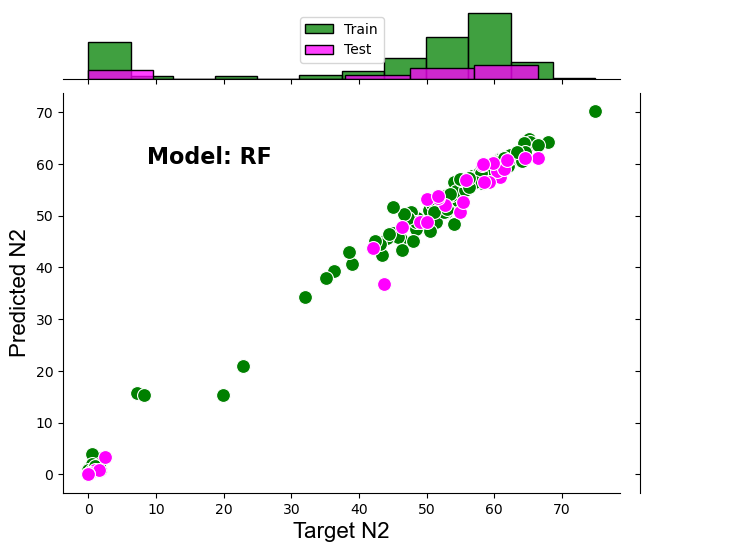

Performance of model number 2 for the output H2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.979 

	 Test R2: 0.961

	 CV R2: 0.884 (+/- 0.070) 

	 Train RMSE: 1.255 

	 Test RMSE: 1.695

	 CV RMSE: 2.726 (+/- 0.746) 



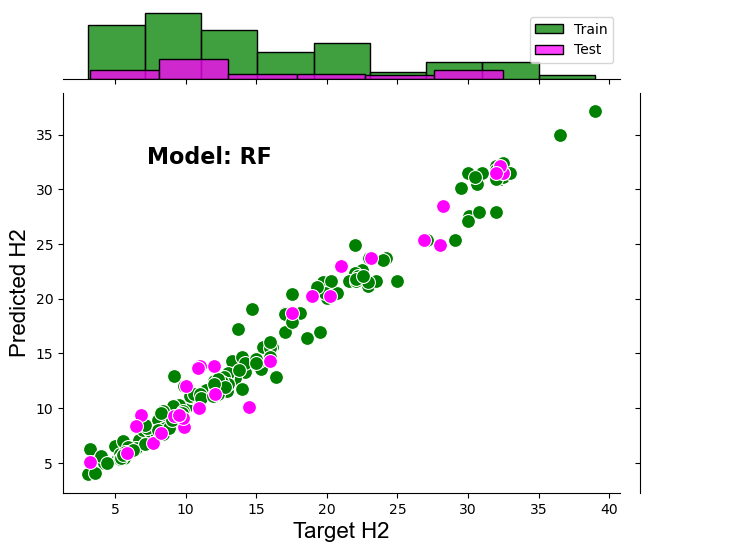

Performance of model number 3 for the output CO [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.989 

	 Test R2: 0.962

	 CV R2: 0.942 (+/- 0.018) 

	 Train RMSE: 1.002 

	 Test RMSE: 1.973

	 CV RMSE: 2.270 (+/- 0.409) 



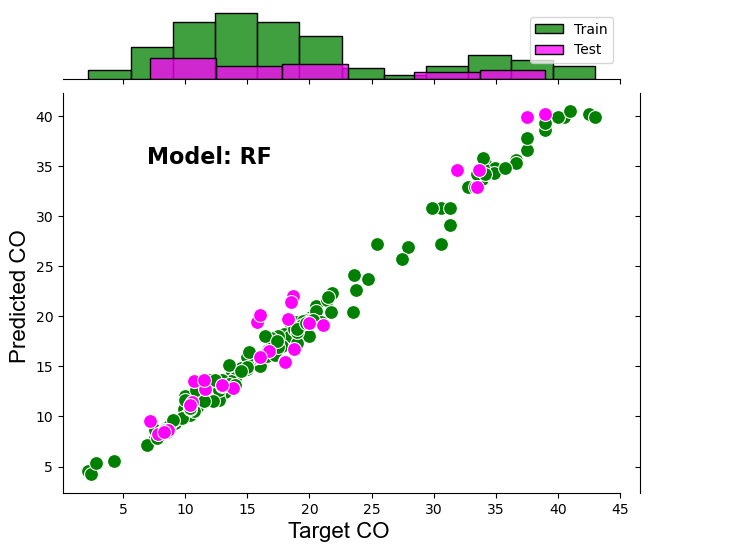

Performance of model number 4 for the output CO2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.989 

	 Test R2: 0.960

	 CV R2: 0.937 (+/- 0.019) 

	 Train RMSE: 0.701 

	 Test RMSE: 1.361

	 CV RMSE: 1.658 (+/- 0.242) 



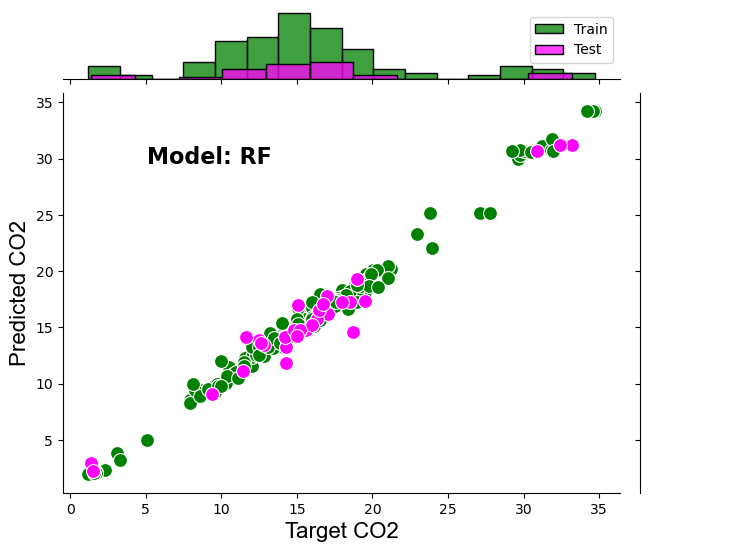

Performance of model number 5 for the output CH4 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.977 

	 Test R2: 0.967

	 CV R2: 0.877 (+/- 0.067) 

	 Train RMSE: 0.417 

	 Test RMSE: 0.460

	 CV RMSE: 0.919 (+/- 0.288) 



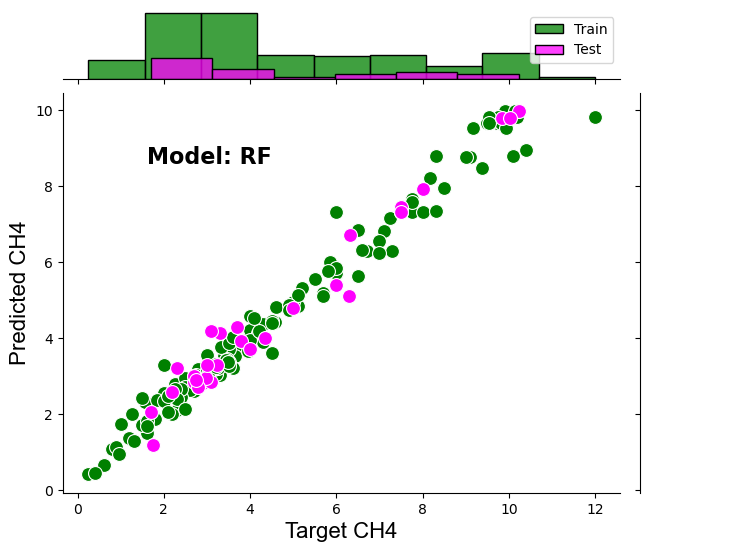

Performance of model number 6 for the output C2Hn [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 26.0 

	 Train R2: 0.946 

	 Test R2: 0.847

	 CV R2: 0.725 (+/- 0.142) 

	 Train RMSE: 0.229 

	 Test RMSE: 0.425

	 CV RMSE: 0.504 (+/- 0.106) 



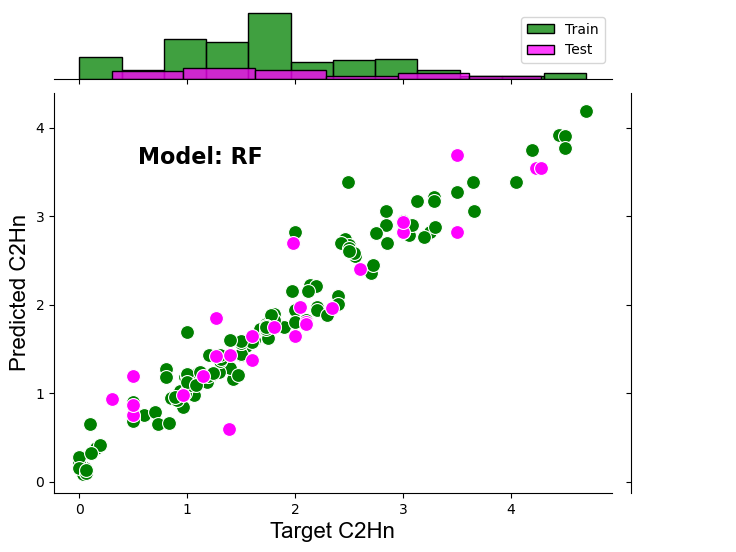

Performance of model number 7 for the output LHV [MJ/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.979 

	 Test R2: 0.944

	 CV R2: 0.932 (+/- 0.023) 

	 Train RMSE: 0.359 

	 Test RMSE: 0.620

	 CV RMSE: 0.635 (+/- 0.068) 



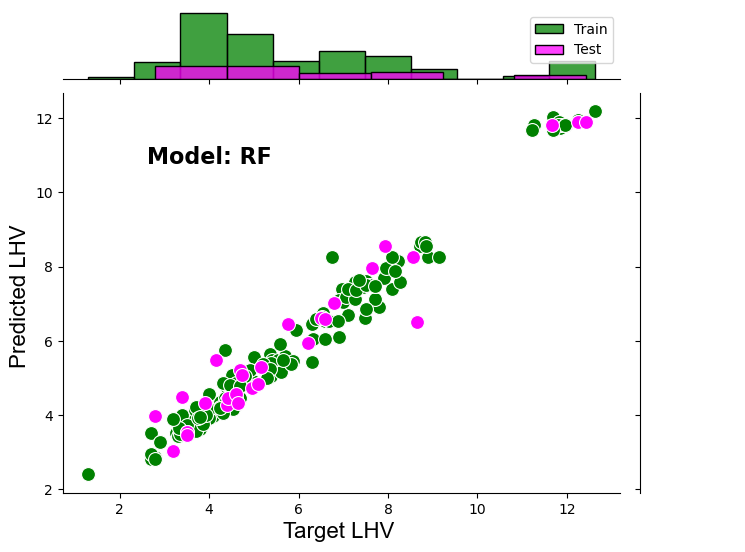

Performance of model number 8 for the output Tar [g/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 21.0 

	 Train R2: 0.954 

	 Test R2: 0.735

	 CV R2: 0.689 (+/- 0.072) 

	 Train RMSE: 4.382 

	 Test RMSE: 10.510

	 CV RMSE: 11.255 (+/- 3.779) 



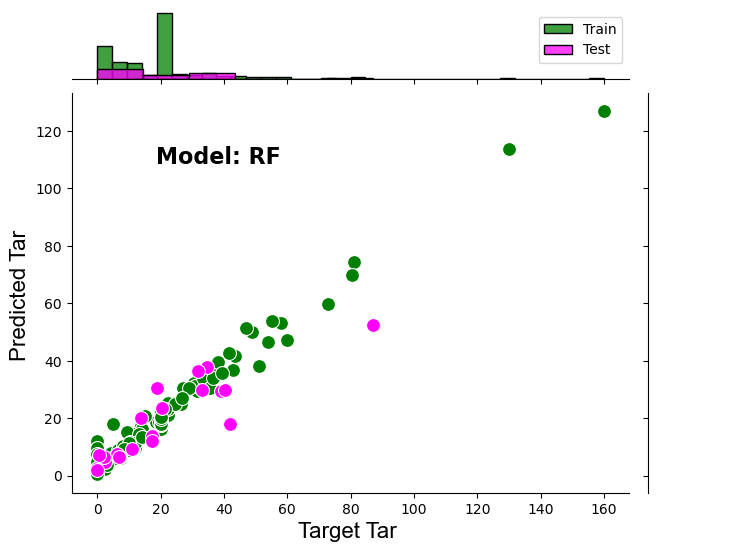

Performance of model number 9 for the output Gas yield [Nm3/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 28.0 

	 Train R2: 0.982 

	 Test R2: 0.953

	 CV R2: 0.932 (+/- 0.022) 

	 Train RMSE: 0.131 

	 Test RMSE: 0.241

	 CV RMSE: 0.256 (+/- 0.053) 



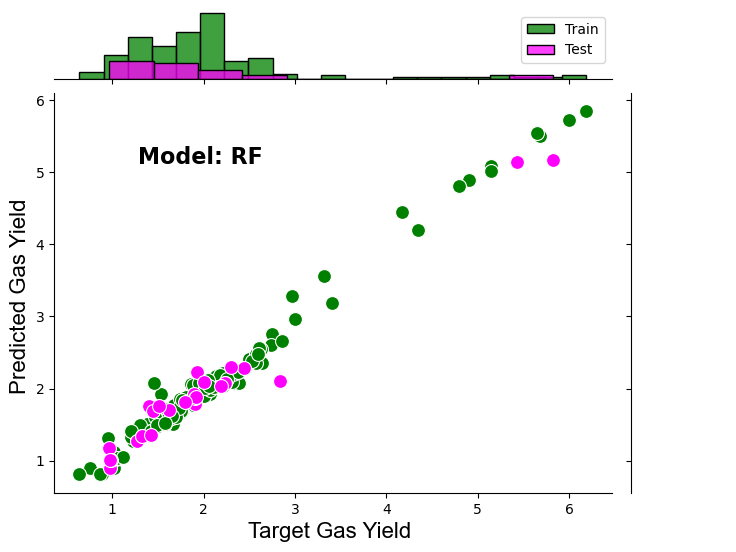

Performance of model number 10 for the output Char yield [g/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 6.0 

	 Train R2: 0.947 

	 Test R2: -0.434

	 CV R2: 0.640 (+/- 0.035) 

	 Train RMSE: 8.716 

	 Test RMSE: 39.324

	 CV RMSE: 22.742 (+/- 5.029) 



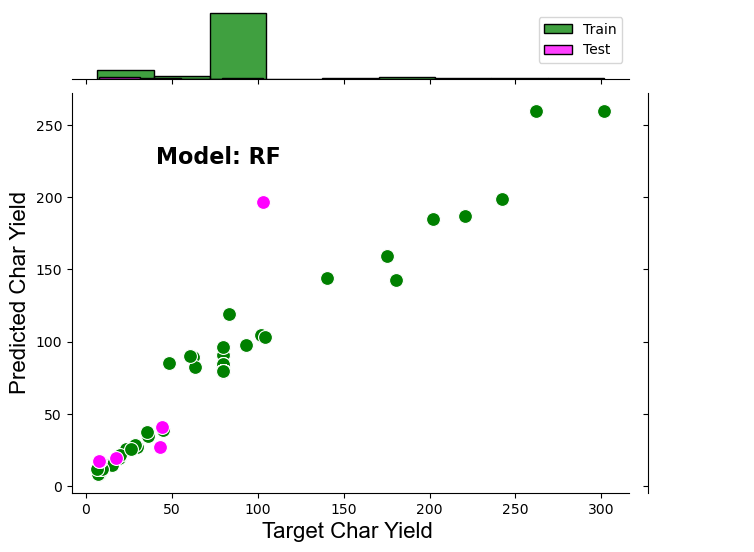

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Mean cross validated R2 value: 0.852 % 



In [17]:
RF_Results = Algorithm_function(df_pred_encoded, df_tar_encoded, modelname = 'RF', CV_folds = 5, optimisation = True, iterations_RandSearch = 'auto')

#### 6-2) Sklearn Gradient Boosting 


GBR model selected!

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Total number of combinations in optimisation grid: 40824 

40 combinations will be considered in search 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Performance of model number 1 for the output N2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.996 

	 Test R2: 0.987

	 CV R2: 0.969 (+/- 0.012) 

	 Train RMSE: 1.415 

	 Test RMSE: 2.725

	 CV RMSE: 3.959 (+/- 0.969) 



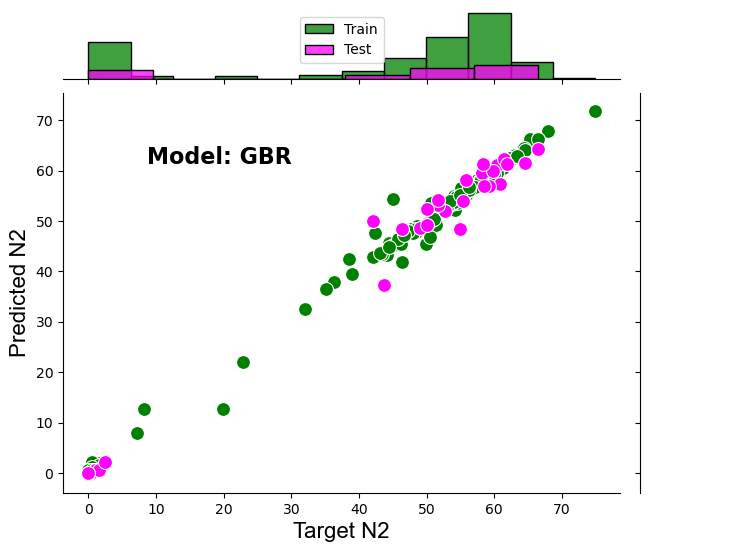

Performance of model number 2 for the output H2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.997 

	 Test R2: 0.953

	 CV R2: 0.908 (+/- 0.051) 

	 Train RMSE: 0.492 

	 Test RMSE: 1.858

	 CV RMSE: 2.451 (+/- 0.612) 



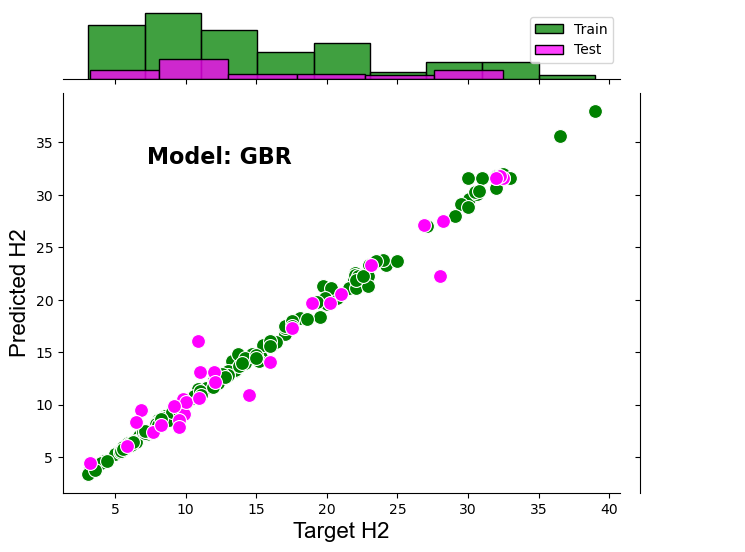

Performance of model number 3 for the output CO [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.996 

	 Test R2: 0.965

	 CV R2: 0.952 (+/- 0.012) 

	 Train RMSE: 0.580 

	 Test RMSE: 1.883

	 CV RMSE: 2.092 (+/- 0.351) 



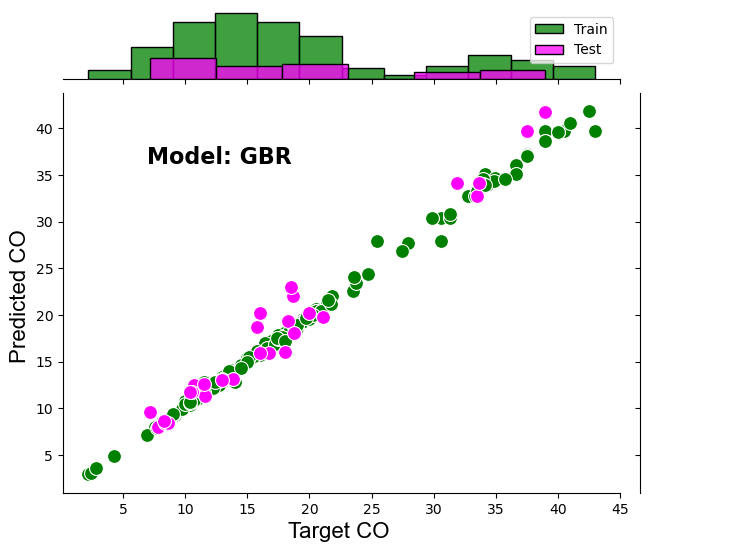

Performance of model number 4 for the output CO2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.994 

	 Test R2: 0.968

	 CV R2: 0.949 (+/- 0.020) 

	 Train RMSE: 0.502 

	 Test RMSE: 1.206

	 CV RMSE: 1.478 (+/- 0.263) 



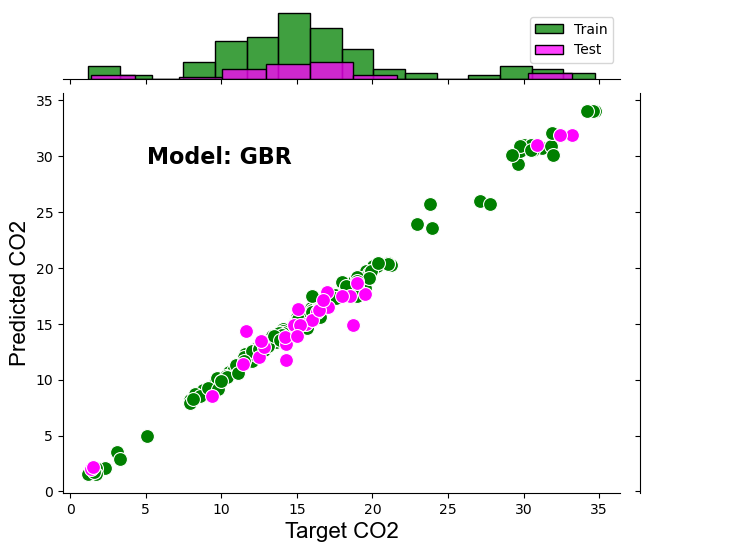

Performance of model number 5 for the output CH4 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.981 

	 Test R2: 0.971

	 CV R2: 0.907 (+/- 0.061) 

	 Train RMSE: 0.385 

	 Test RMSE: 0.432

	 CV RMSE: 0.790 (+/- 0.278) 



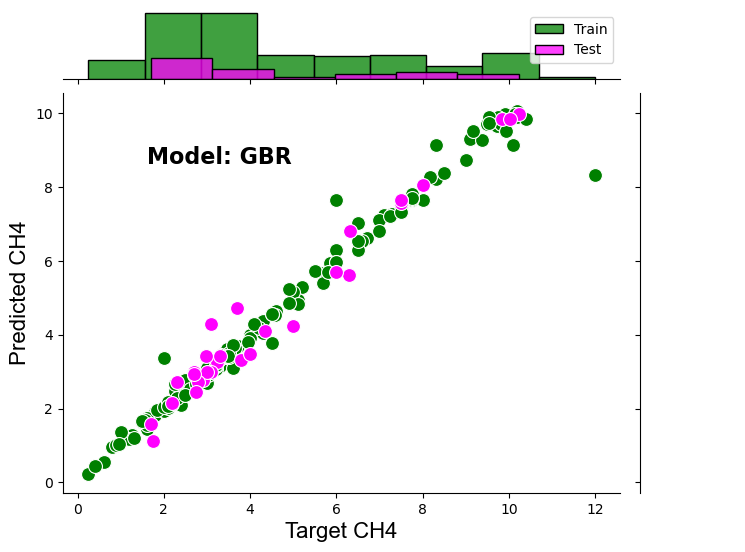

Performance of model number 6 for the output C2Hn [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 26.0 

	 Train R2: 0.972 

	 Test R2: 0.884

	 CV R2: 0.800 (+/- 0.090) 

	 Train RMSE: 0.165 

	 Test RMSE: 0.370

	 CV RMSE: 0.435 (+/- 0.080) 



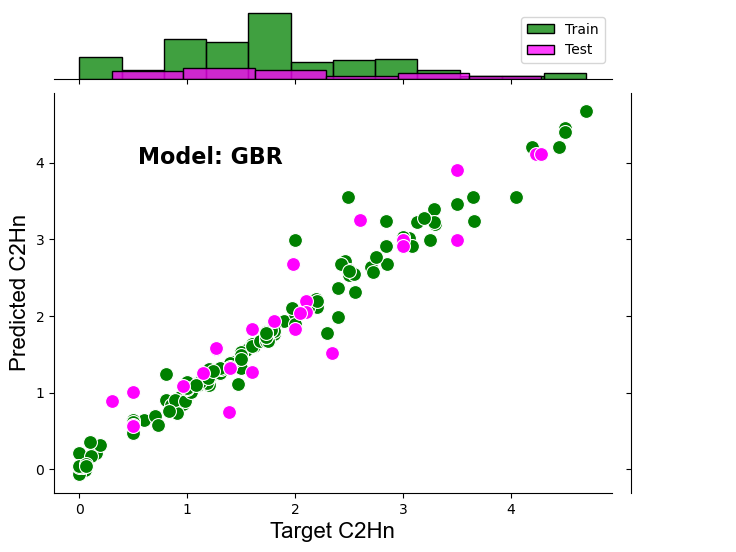

Performance of model number 7 for the output LHV [MJ/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.977 

	 Test R2: 0.946

	 CV R2: 0.927 (+/- 0.021) 

	 Train RMSE: 0.379 

	 Test RMSE: 0.608

	 CV RMSE: 0.663 (+/- 0.064) 



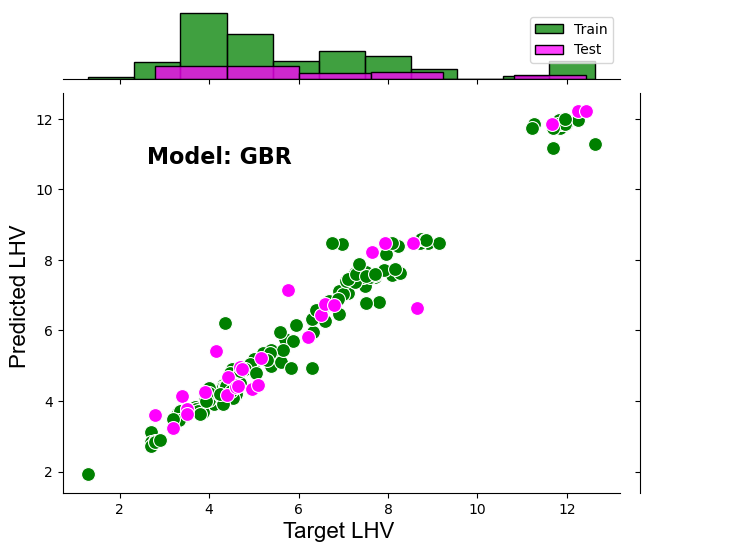

Performance of model number 8 for the output Tar [g/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 21.0 

	 Train R2: 0.995 

	 Test R2: 0.659

	 CV R2: 0.734 (+/- 0.078) 

	 Train RMSE: 1.505 

	 Test RMSE: 11.910

	 CV RMSE: 10.058 (+/- 2.396) 



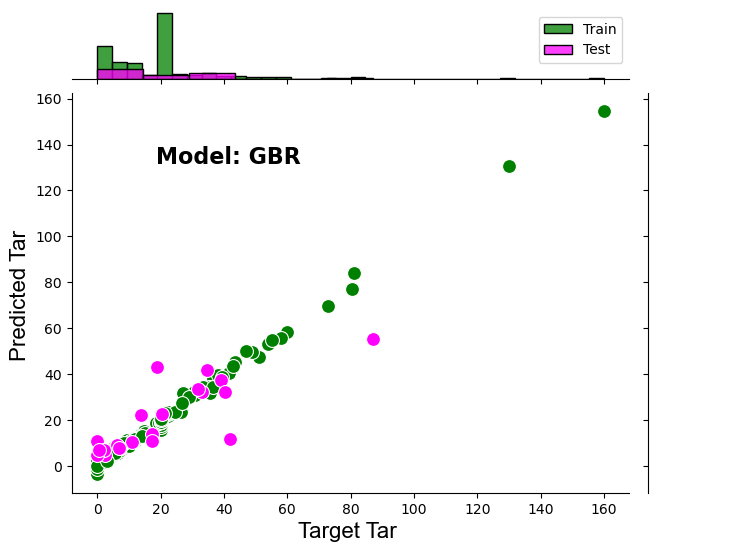

Performance of model number 9 for the output Gas yield [Nm3/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 28.0 

	 Train R2: 0.992 

	 Test R2: 0.969

	 CV R2: 0.957 (+/- 0.014) 

	 Train RMSE: 0.086 

	 Test RMSE: 0.196

	 CV RMSE: 0.201 (+/- 0.029) 



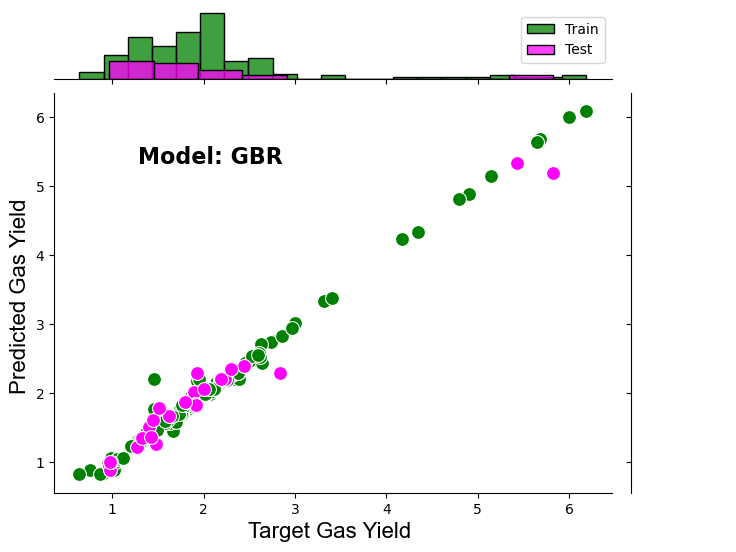

Performance of model number 10 for the output Char yield [g/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 6.0 

	 Train R2: 0.997 

	 Test R2: -1.581

	 CV R2: 0.649 (+/- 0.161) 

	 Train RMSE: 2.197 

	 Test RMSE: 52.744

	 CV RMSE: 21.937 (+/- 7.691) 



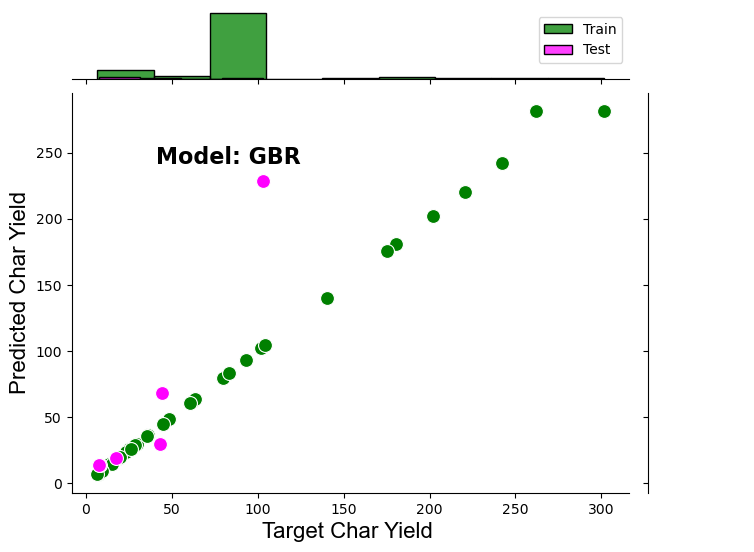

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Mean cross validated R2 value: 0.875 % 



In [18]:
GBR_Results = Algorithm_function(df_pred_encoded, df_tar_encoded, modelname = 'GBR', CV_folds = 5, optimisation = True, iterations_RandSearch = 'auto')

#### 6-3) AdaBoost


AdaBoost model selected!

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Total number of combinations in optimisation grid: 630 

37 combinations will be considered in search 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Performance of model number 1 for the output N2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.995 

	 Test R2: 0.982

	 CV R2: 0.964 (+/- 0.011) 

	 Train RMSE: 1.637 

	 Test RMSE: 3.203

	 CV RMSE: 4.250 (+/- 0.776) 



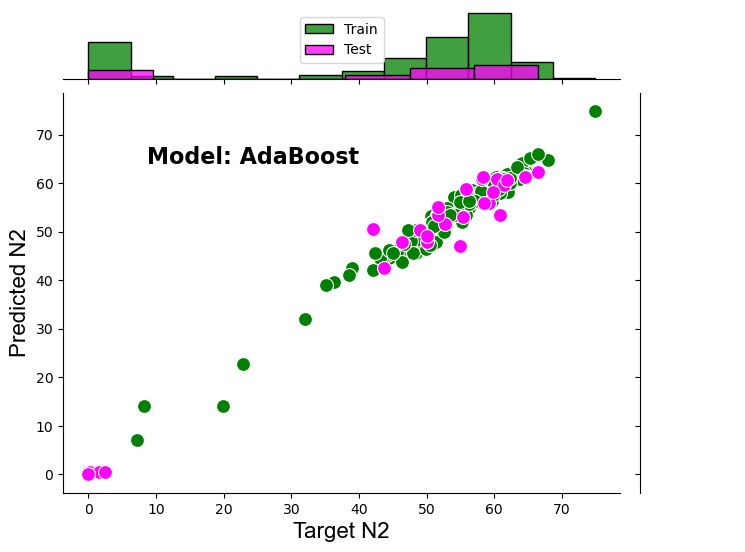

Performance of model number 2 for the output H2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.997 

	 Test R2: 0.938

	 CV R2: 0.881 (+/- 0.081) 

	 Train RMSE: 0.468 

	 Test RMSE: 2.138

	 CV RMSE: 2.701 (+/- 0.649) 



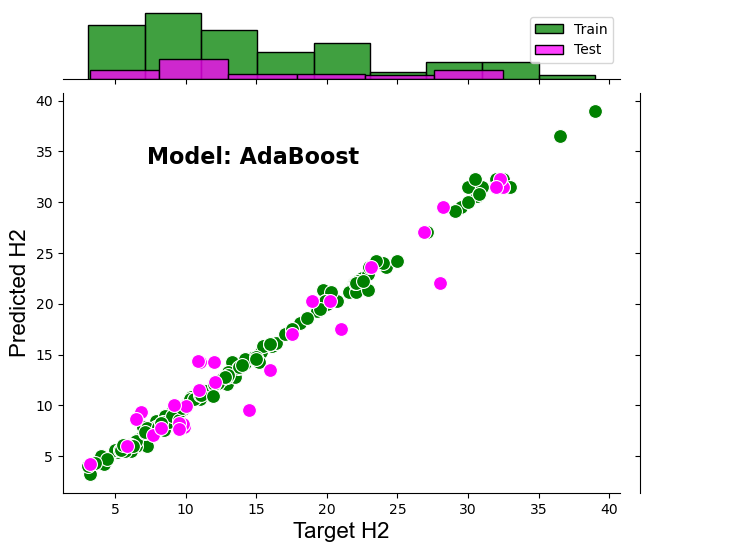

Performance of model number 3 for the output CO [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.993 

	 Test R2: 0.957

	 CV R2: 0.947 (+/- 0.011) 

	 Train RMSE: 0.807 

	 Test RMSE: 2.098

	 CV RMSE: 2.178 (+/- 0.242) 



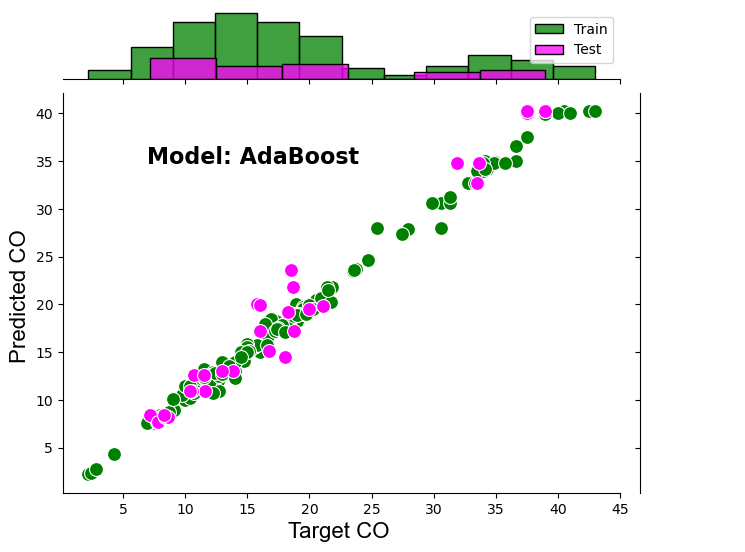

Performance of model number 4 for the output CO2 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.990 

	 Test R2: 0.965

	 CV R2: 0.937 (+/- 0.025) 

	 Train RMSE: 0.664 

	 Test RMSE: 1.270

	 CV RMSE: 1.639 (+/- 0.291) 



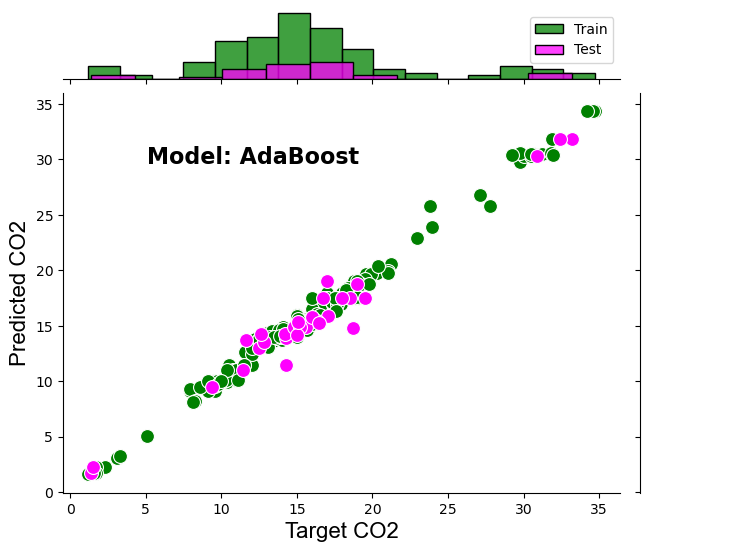

Performance of model number 5 for the output CH4 [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.988 

	 Test R2: 0.931

	 CV R2: 0.887 (+/- 0.058) 

	 Train RMSE: 0.305 

	 Test RMSE: 0.667

	 CV RMSE: 0.891 (+/- 0.247) 



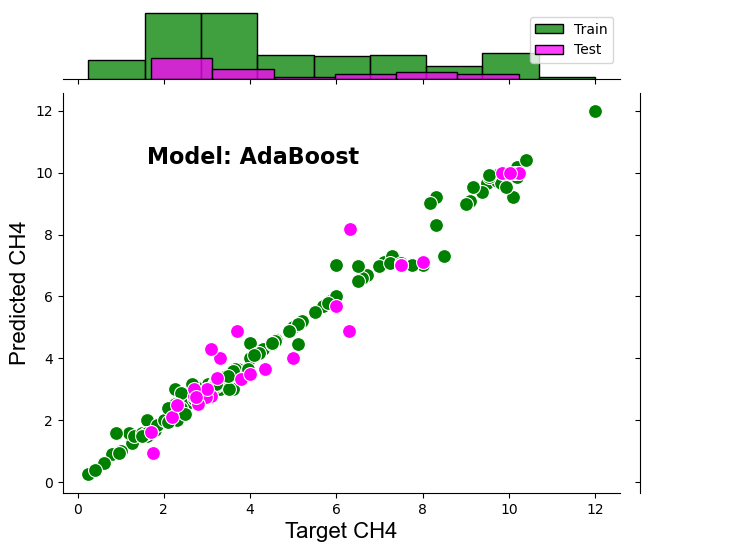

Performance of model number 6 for the output C2Hn [vol.% db] :

Number of samples in training set: 163.0 	 Number of sample in test set: 26.0 

	 Train R2: 0.978 

	 Test R2: 0.808

	 CV R2: 0.708 (+/- 0.163) 

	 Train RMSE: 0.146 

	 Test RMSE: 0.477

	 CV RMSE: 0.517 (+/- 0.117) 



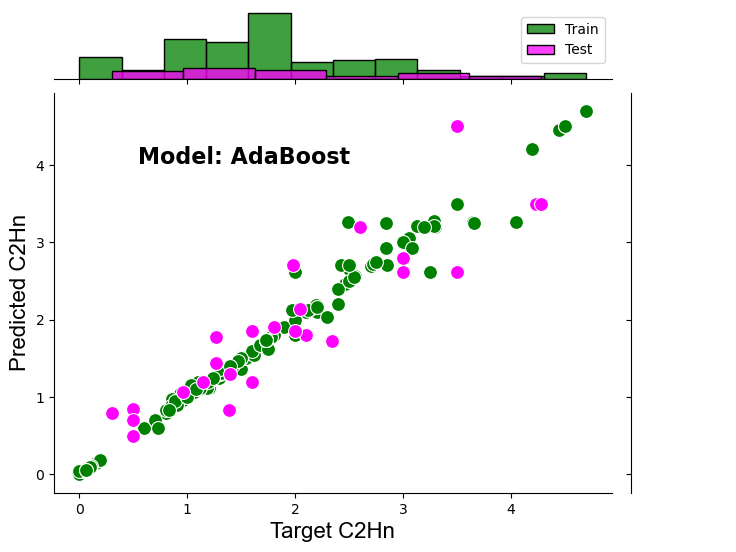

Performance of model number 7 for the output LHV [MJ/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 30.0 

	 Train R2: 0.993 

	 Test R2: 0.937

	 CV R2: 0.917 (+/- 0.030) 

	 Train RMSE: 0.215 

	 Test RMSE: 0.661

	 CV RMSE: 0.701 (+/- 0.081) 



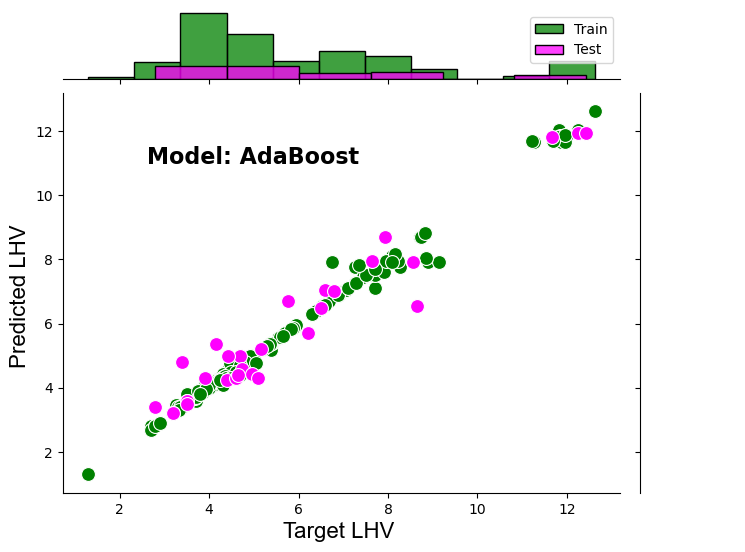

Performance of model number 8 for the output Tar [g/Nm3] :

Number of samples in training set: 163.0 	 Number of sample in test set: 21.0 

	 Train R2: 0.998 

	 Test R2: 0.538

	 CV R2: 0.341 (+/- 0.768) 

	 Train RMSE: 0.915 

	 Test RMSE: 13.864

	 CV RMSE: 14.380 (+/- 10.820) 



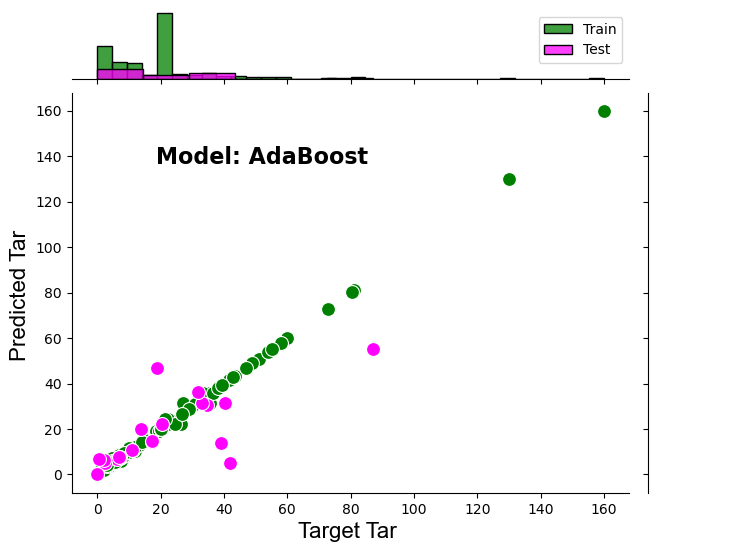

Performance of model number 9 for the output Gas yield [Nm3/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 28.0 

	 Train R2: 0.957 

	 Test R2: 0.930

	 CV R2: 0.912 (+/- 0.013) 

	 Train RMSE: 0.201 

	 Test RMSE: 0.295

	 CV RMSE: 0.292 (+/- 0.040) 



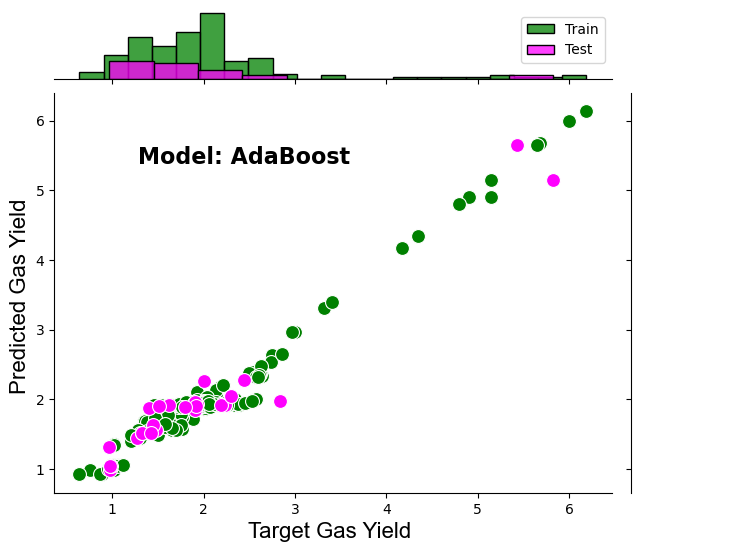

Performance of model number 10 for the output Char yield [g/kg wb] :

Number of samples in training set: 163.0 	 Number of sample in test set: 6.0 

	 Train R2: 0.991 

	 Test R2: -1.258

	 CV R2: 0.658 (+/- 0.147) 

	 Train RMSE: 3.505 

	 Test RMSE: 49.339

	 CV RMSE: 21.576 (+/- 6.781) 



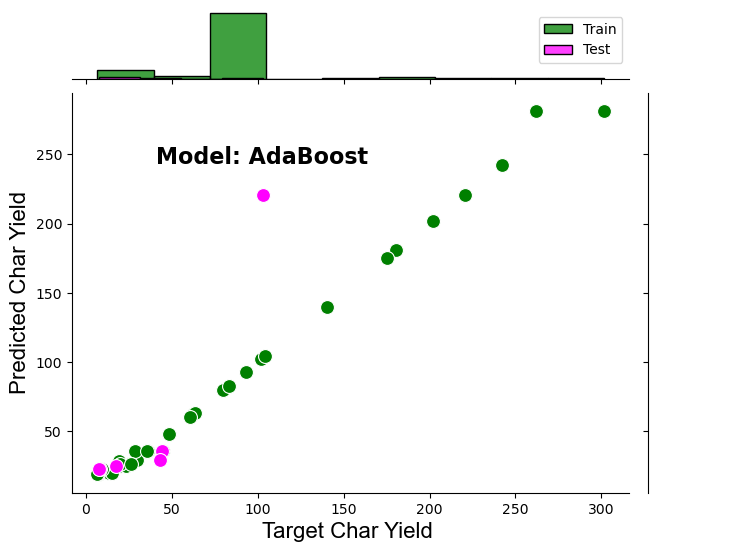

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Mean cross validated R2 value: 0.815 % 



In [19]:
AdaBoost_Results = Algorithm_function(df_pred_encoded, df_tar_encoded, modelname = 'AdaBoost', CV_folds = 5, optimisation = True, iterations_RandSearch = 'auto')

In [20]:
# Summary of key model scores (mean values shown - individual values shown in cell below)

# Select models to be stored
modellabels = ['RF','GBR', 'AdaBoost']

# Initialise dataframe
# CV R2
optmised_models_summary = pd.DataFrame(columns= modellabels, index = ['R2_CV', 'R2_test', 'RMSE_CV', 'RMSE_test'])
optmised_models_summary.loc['R2_CV']['RF'] = np.mean(RF_Results.loc['R2_CV'])
optmised_models_summary.loc['R2_CV']['GBR'] = np.mean(GBR_Results.loc['R2_CV'])
optmised_models_summary.loc['R2_CV']['AdaBoost'] = np.mean(AdaBoost_Results.loc['R2_CV'])

# R2 for test set
optmised_models_summary.loc['R2_test']['RF'] = np.mean(RF_Results.loc['R2_test'])
optmised_models_summary.loc['R2_test']['GBR'] = np.mean(GBR_Results.loc['R2_test'])
optmised_models_summary.loc['R2_test']['AdaBoost'] = np.mean(AdaBoost_Results.loc['R2_test'])

# CV RMSE
optmised_models_summary.loc['RMSE_CV']['RF'] = np.mean(RF_Results.loc['RMSE_CV'])
optmised_models_summary.loc['RMSE_CV']['GBR'] = np.mean(GBR_Results.loc['RMSE_CV'])
optmised_models_summary.loc['RMSE_CV']['AdaBoost'] = np.mean(AdaBoost_Results.loc['RMSE_CV'])

# RMSE for test set
optmised_models_summary.loc['RMSE_test']['RF'] = np.mean(RF_Results.loc['RMSE_test'])
optmised_models_summary.loc['RMSE_test']['GBR'] = np.mean(GBR_Results.loc['RMSE_test'])
optmised_models_summary.loc['RMSE_test']['AdaBoost'] = np.mean(AdaBoost_Results.loc['RMSE_test'])

# Display performance of models
optmised_models_summary

,RF,GBR,AdaBoost
R2_CV,0.852275,0.875028,0.815379
R2_test,0.788404,0.672332,0.672689
RMSE_CV,4.710627,4.406351,4.912403
RMSE_test,5.90556,7.393217,7.401359


In [21]:
# Summary of individual model scores

# List of output models to be columns of dataframe
modellabels = RF_Results.columns

# Initialise dataframe
optmised_individual_models_summary = pd.DataFrame(columns= modellabels, index = ['RF_R2_CV', 'GBR_R2_CV',  'AdaBoost_R2_CV', # R2 CV
                                                                                 'RF_R2_test', 'GBR_R2_test', 'AdaBoost_R2_test', # R2 test
                                                                                 'RF_RMSE_CV', 'GBR_RMSE_CV', 'AdaBoost_RMSE_CV', # RMSE CV
                                                                                 'RF_RMSE_test', 'GBR_RMSE_test', 'AdaBoost_RMSE_test', # RMSE test
                                                                                ]) 
# CV R2
optmised_individual_models_summary.loc['RF_R2_CV'] = RF_Results.loc['R2_CV']
optmised_individual_models_summary.loc['GBR_R2_CV'] = GBR_Results.loc['R2_CV']
optmised_individual_models_summary.loc['AdaBoost_R2_CV'] = AdaBoost_Results.loc['R2_CV']

# R2 for test set
optmised_individual_models_summary.loc['RF_R2_test'] = RF_Results.loc['R2_test']
optmised_individual_models_summary.loc['GBR_R2_test'] = GBR_Results.loc['R2_test']
optmised_individual_models_summary.loc['AdaBoost_R2_test'] = AdaBoost_Results.loc['R2_test']

# CV RMSE
optmised_individual_models_summary.loc['RF_RMSE_CV'] = RF_Results.loc['RMSE_CV']
optmised_individual_models_summary.loc['GBR_RMSE_CV'] = GBR_Results.loc['RMSE_CV']
optmised_individual_models_summary.loc['AdaBoost_RMSE_CV'] = AdaBoost_Results.loc['RMSE_CV']

# RMSE for test set
optmised_individual_models_summary.loc['RF_RMSE_test'] = RF_Results.loc['RMSE_test']
optmised_individual_models_summary.loc['GBR_RMSE_test'] = GBR_Results.loc['RMSE_test']
optmised_individual_models_summary.loc['AdaBoost_RMSE_test'] = AdaBoost_Results.loc['RMSE_test']

# Display performance of models
optmised_individual_models_summary

,N2 [vol.% db],H2 [vol.% db],CO [vol.% db],CO2 [vol.% db],CH4 [vol.% db],C2Hn [vol.% db],LHV [MJ/Nm3],Tar [g/Nm3],Gas yield [Nm3/kg wb],Char yield [g/kg wb]
RF_R2_CV,0.964836,0.883769,0.942431,0.937172,0.877163,0.724779,0.932243,0.689031,0.931619,0.63971
GBR_R2_CV,0.9687,0.907535,0.95177,0.949079,0.906646,0.799885,0.926668,0.733975,0.957339,0.648687
AdaBoost_R2_CV,0.963596,0.881475,0.947493,0.937418,0.887252,0.708359,0.916538,0.341264,0.912414,0.65798
RF_R2_test,0.989395,0.961276,0.961677,0.959825,0.967033,0.847016,0.944165,0.734804,0.95328,-0.434432
GBR_R2_test,0.986848,0.953442,0.965077,0.968473,0.970935,0.884102,0.946256,0.659429,0.96933,-1.580572
AdaBoost_R2_test,0.981834,0.93833,0.956658,0.965012,0.930594,0.807566,0.936613,0.538461,0.92995,-1.258128
RF_RMSE_CV,4.140879,2.726251,2.269524,1.658307,0.919402,0.504003,0.634746,11.254879,0.256354,22.741923
GBR_RMSE_CV,3.958897,2.450683,2.091831,1.477974,0.789662,0.43459,0.663326,10.058168,0.201031,21.937345
AdaBoost_RMSE_CV,4.250002,2.701031,2.177502,1.638721,0.890972,0.516648,0.700704,14.37997,0.292315,21.576167
RF_RMSE_test,2.447025,1.694576,1.972709,1.361198,0.460001,0.4253,0.619978,10.509522,0.241325,39.32397


In [22]:

# Create Function to scale values in array to choosen range:
def ScaleArray(array, lower_bound = 0, upper_bound = 1):
    scaled_array = lower_bound + (array - np.min(array)) / (np.max(array) - np.min(array))*(upper_bound - lower_bound)
    return scaled_array

# Create function that splits array in half:
def SplitArray(array):
    half = len(array)//2
    FirstHalf = array[:half]
    SecondHalf = array[half:]
    return FirstHalf, SecondHalf

In [23]:
def ScatterAll(performance_summary, modeltype):
        

    # Initialise Figure 
    plt.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    
    marker_style = 'varied'
    marker_styles = np.array(matplotlib.markers.MarkerStyle.filled_markers)
    
    # Loop to extract, scale, and plot values
    for column in np.arange(performance_summary.columns.shape[0]):

        # Extract predictions and targets
        predictions = performance_summary.iloc[:,column]['test_predictions']
        targets = np.array(performance_summary.iloc[:,column]['test_targets'])
        combined_array = np.concatenate((targets, predictions)) # combined to scale together 
        scaled_array = ScaleArray(combined_array)
        scaled_predictions, scaled_targets =  SplitArray(scaled_array)

        # Extract correspoding label and marker styles
        legend_label = np.array(RF_Results.columns)[column]
        
        marker = marker_styles[column]
            
        # Plot predictions vs. targets
        ax1.scatter(scaled_targets, scaled_predictions, marker=marker, label=legend_label, s=60, alpha=0.7, zorder=3)
    
    # Configure graph
    plt.legend(loc='upper left');
    plt.legend([r'N2',
                r'H2',
                r'CO',
                r'CO2',
                r'CH4',
                r'C2Hn',
                r'LHV',
                r'Tar',
                r'Gas Yield',
                r'Char Yield'
               ])

    plt.xlabel('Scaled Targets', fontsize= 18)
    plt.ylabel('Scaled Predictions', fontsize= 18)
    
    # Add best fit line
    line = np.linspace(min(scaled_array),max(scaled_array))
    ax1.plot(line, line,color = 'black', linewidth=1.5, linestyle='dashed', zorder=4)
    
    # Add error regions
    ax1.fill_between(line, line - 0.1, line + 0.1,color ='blue', alpha = 0.1, zorder=1) # 10% error
    ax1.fill_between(line, line - 0.2, line + 0.2,color ='red', alpha = 0.08, zorder=2) # 20% error

    # Add title
    plt.title(f"Model: {modeltype}", fontsize=20, loc='left')
    
    # Save plot
    #folder_path = r"D:\University\دروس\ارشد\جرم پیشرفته\Project\main\Plots"
    #filename = f"mix_plot_{modeltype}.png"
    #filepath = os.path.join(folder_path, filename)
    #plt.savefig(filepath , dpi=500)
        
    plt.show()
    

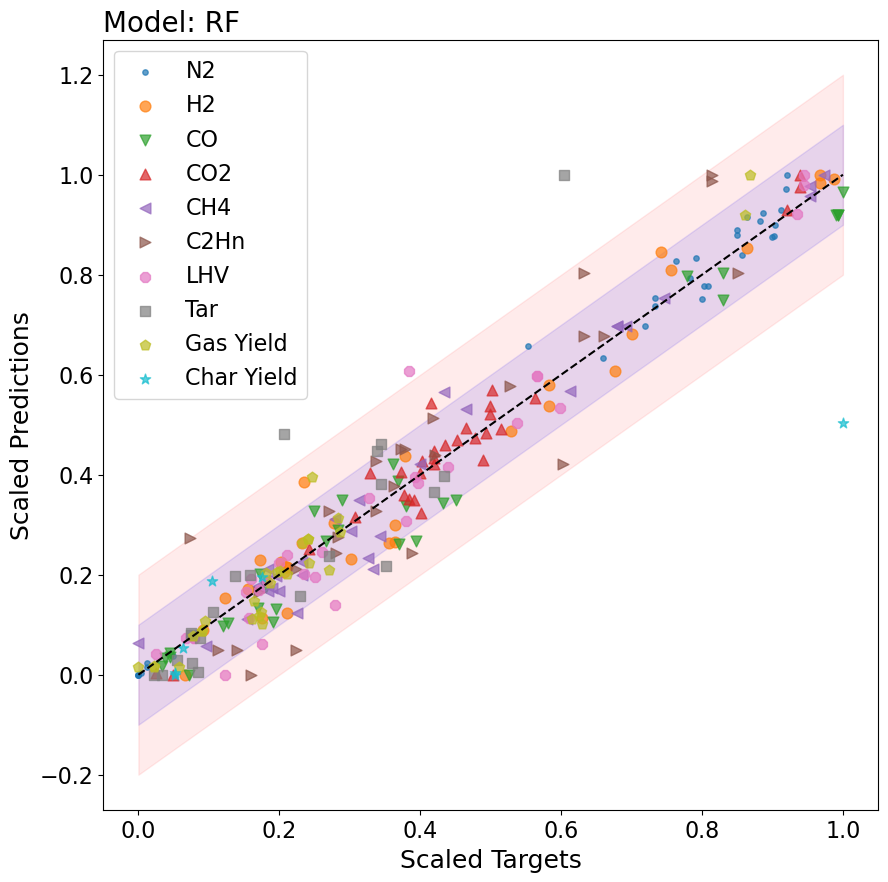

In [24]:
# RF
ScatterAll(performance_summary=RF_Results, modeltype='RF')

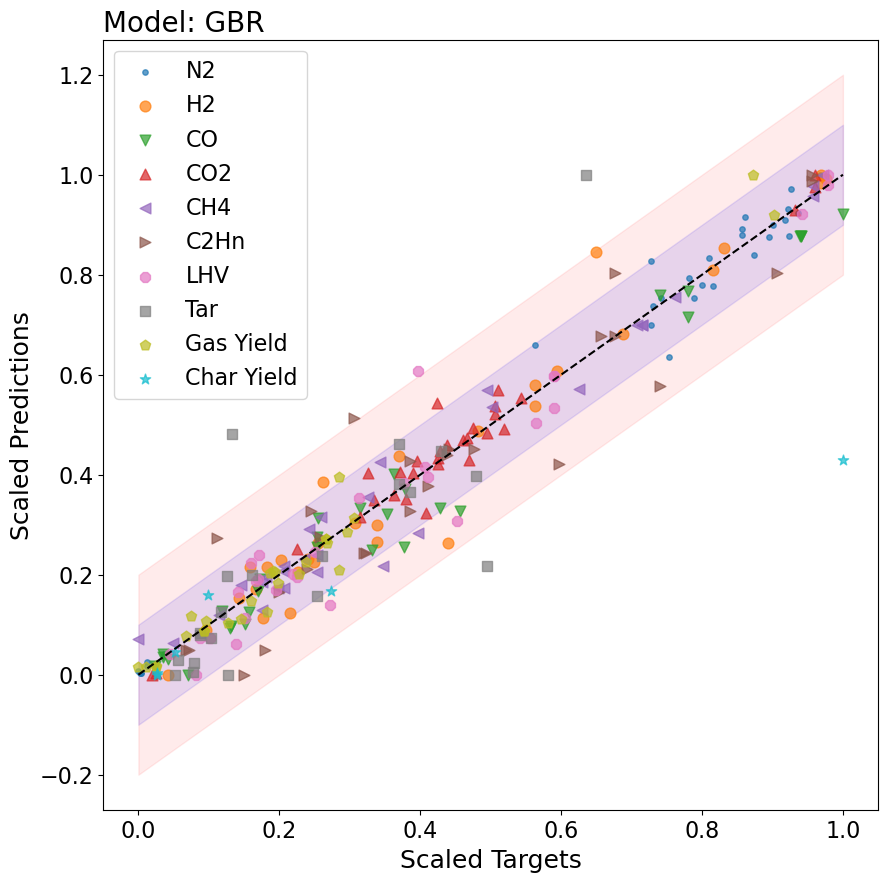

In [25]:
# GBR
ScatterAll(performance_summary=GBR_Results, modeltype='GBR')

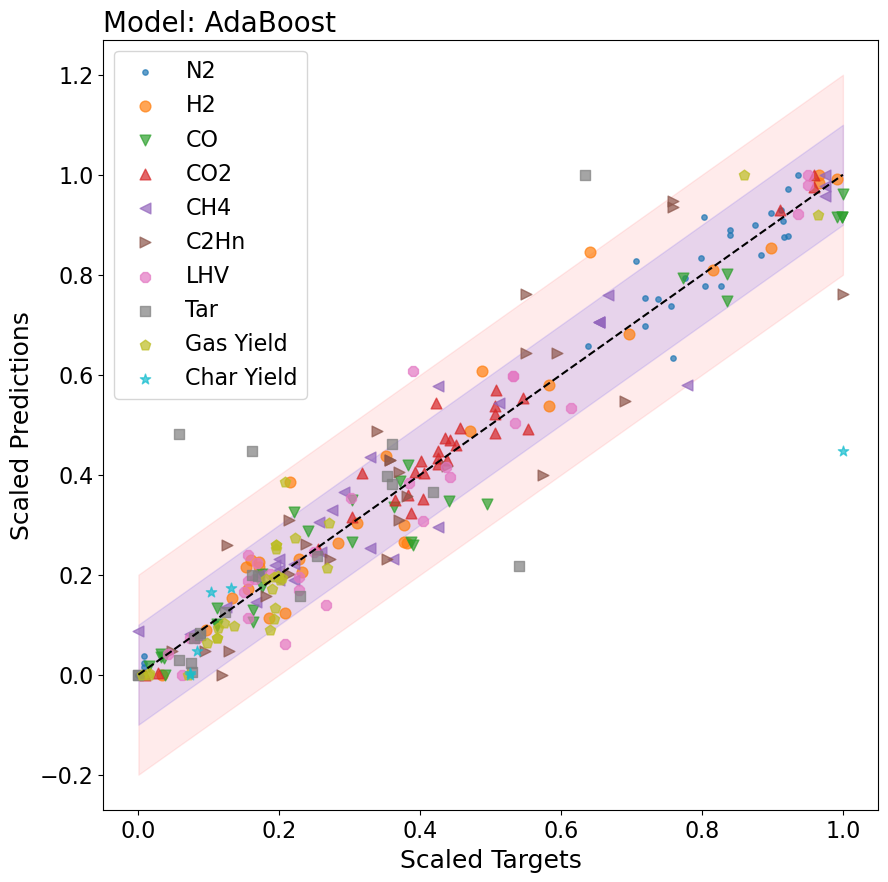

In [26]:
# AdaBoost
ScatterAll(performance_summary=AdaBoost_Results, modeltype='AdaBoost')